### Introduction to Linear Programming with Python

In [2]:
# ! pip install pulp

In [1]:
from pulp import *
import pandas as pd

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from pandas.tools.plotting import scatter_matrix

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display

# various options in pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)
plt.rcParams['figure.figsize'] = (12, 6)

# import time

### What is linear programming?

Linear programming is the optimization of an outcome based on some set of constraints using a linear mathematical model. It is simple yet a very powerful tool to enable mathematical decision making under constraints. 

- Understand the problem :) 
- Define decision variables: our choices that are under our control. 
- Define objective & objective function: a criterion that we wish to minimize (e.g., cost) or maximize (e.g., profit)
- Define constraints: the limitations that restrict our choices for decision variables.


Traditionally, any LP problem can be solved graphically by plotting the constraint equations and narrowing down the feasible region to find the optimum values of the decision variables.

A lot of situations we come across in everyday life have processes that follow linear relationships with several day to day factors. As such, linear programming finds in application in many unique ways and in different domains of science and technology such as routing and logistics, financial planning, manufacturing, product mix etc. 

Here in this notebook we will see an introduction to linear programming, how to use LP framework in Python using PuLP by giving simple examples and a real life example of optimizing everyday life. Once we properly translate the problem with algebraic expressions, we can find solutions to relevant everyday problems. 


### Let's start with a simple example:

    You are taking a test in which items of type A are worth 10 points and items of type B are worth 15 points. 
    It takes 3 minutes for each item of type A and 6 minutes for each item of type B. 
    Total time allowed is 60 minutes, and you may not answer more than 16 questions. 
    Assuming all your answers are correct, 
    how many items of each type should you answer in order to get the best score?

ADD GRAPHS & hand written solution

Solution with using PuLP:

In [78]:
#define variables
x = LpVariable('x', lowBound=0, cat='Integer')
y = LpVariable('y', lowBound=0, cat='Integer')

prob = LpProblem("test", LpMaximize) #objective

#these are constraints and not an objective as there is a equality/inequality
prob += 3*x+6*y <= 60
prob += x+y <= 16

#objective function
prob += 10*x+15*y

prob.writeLP("test.lp" )
print(prob)

#solve
status = prob.solve()

test:
MAXIMIZE
10*x + 15*y + 0
SUBJECT TO
_C1: 3 x + 6 y <= 60

_C2: x + y <= 16

VARIABLES
0 <= x Integer
0 <= y Integer



In [79]:
print("Status:", LpStatus[prob.status])
print ("Individual decision_variables: ")
for v in prob.variables():
    print(v.name, "=", v.varValue)
print ("Value of the obj function: ")
print(value(prob.objective))

Status: Optimal
Individual decision_variables: 
x = 12.0
y = 4.0
Value of the obj function: 
180.0


In [77]:
x.cat

'Integer'

### Example 2: 

    A snack bar cooks and sells hamburgers and hot dogs during football games. To stay in business it must sell at least 10 hamburgers but cannot cook more than 40. It must also sell at least 30 hot dogs but cannot cook more than 70. It cannot cook more than 90 sandwiches all together. The profit on a hamburger is $0.33 and $0.21 on a hot dog. How many of each kind of sandwich should the stand sell to make the maximum profit?

In [5]:
#define variables
x = LpVariable('x', lowBound=10, upBound=40, cat='Integer') # number of hamburgers
y = LpVariable('y', lowBound=30, upBound=70, cat='Integer') # number of hotdogs 

prob = LpProblem("snack", LpMaximize) #objective 

#constraints 
# prob += x <= 40
# prob += x >= 10
# prob += x <= 70
# prob += x >= 30
prob += x+y <= 90

#objective function
prob += 0.33*x+0.21*y

#print the LP problem
print(prob)

#solve
status = prob.solve()

snack:
MAXIMIZE
0.33*x + 0.21*y + 0.0
SUBJECT TO
_C1: x + y <= 90

VARIABLES
10 <= x <= 40 Integer
30 <= y <= 70 Integer



In [6]:
print("Status:", LpStatus[prob.status])
print ("Individual decision_variables: ")
for v in prob.variables():
    print(v.name, "=", v.varValue)
    
print ("Value of the obj function: ")
print(value(prob.objective))

Status: Optimal
Individual decision_variables: 
x = 40.0
y = 50.0
Value of the obj function: 
23.700000000000003


### Example 3: Chairs and Tables
    Giapetto, Inc. manufactures two types of furniture: chairs and tables. The manufacturer wants to maximize their weekly profit. $20 of profit per chair and $30 of profit per table. A chair requires 1 hour of finishing labor and 2 hours of carpentry labor. A table requires 2 hours of finishing labor and 1 hour of carpentry labor. Each week, Giapetto has only 100 finishing hours and 100 carpentry hours available. 

$x_1$: number of chairs produced each week

$x_2$: number of tables produced each week

In [7]:
prob = LpProblem("Giapetto", LpMaximize)  # Create a LP maximization problem
x1 = LpVariable("x1", lowBound=0) # Create a variable x1 >= 0
x2 = LpVariable("x2", lowBound=0) # Create another variable x2 >= 0
prob += 20*x1 + 30*x2  # Objective function
prob += 1*x1 + 2*x2 <= 100  # Finishing hours
prob += 2*x1 + 1*x2 <= 100  # Carpentry hours
print(prob)  # Display the LP problem

#solve
status = prob.solve()

Giapetto:
MAXIMIZE
20*x1 + 30*x2 + 0
SUBJECT TO
_C1: x1 + 2 x2 <= 100

_C2: 2 x1 + x2 <= 100

VARIABLES
x1 Continuous
x2 Continuous



In [8]:
print("Status:", LpStatus[prob.status])
print ("Individual decision_variables: ")
for v in prob.variables():
    print(v.name, "=", v.varValue)
print ("Value of the obj function: ")
print(value(prob.objective))

Status: Optimal
Individual decision_variables: 
x1 = 33.333333
x2 = 33.333333
Value of the obj function: 
1666.6666500000001


#### Integer Linear Programming (ILP)
$x_1$: integer number of chairs produced each week

$x_2$: integer number of tables produced each week

In [9]:
prob = LpProblem("Giapetto", LpMaximize)  # Create a LP maximization problem
x1 = LpVariable("x1", lowBound=0, cat='Integer') # Create a variable x1 >= 0
x2 = LpVariable("x2", lowBound=0, cat='Integer') # Create another variable x2 >= 0
prob += 20*x1 + 30*x2  # Objective function
prob += 1*x1 + 2*x2 <= 100  # Finishing hours
prob += 2*x1 + 1*x2 <= 100  # Carpentry hours
print(prob)  # Display the LP problem

#solve
status = prob.solve()

Giapetto:
MAXIMIZE
20*x1 + 30*x2 + 0
SUBJECT TO
_C1: x1 + 2 x2 <= 100

_C2: 2 x1 + x2 <= 100

VARIABLES
0 <= x1 Integer
0 <= x2 Integer



In [10]:
print("Status:", LpStatus[prob.status])
print ("Individual decision_variables: ")
for v in prob.variables():
    print(v.name, "=", v.varValue)
print ("Value of the obj function: ")
print(value(prob.objective))

Status: Optimal
Individual decision_variables: 
x1 = 32.0
x2 = 34.0
Value of the obj function: 
1660.0


### Find the recipes! 

I used Epicurious recipes dataset that is available on kaggle: https://www.kaggle.com/hugodarwood/epirecipes/version/2

Cleaned it a little bit and we will use a subset of this dataset to find recipes that satisfies our macronutrient requirements we define.

Problem: We would like to have a x number of recipes that maximize our protein intake while keeping sodium and calorie intake below a certain level. 

In [11]:
df = pd.read_csv('data.csv')

In [12]:
# first 5 rows of data
print("\n First 5 rows: ")
display(df.head())

# size of the dataset
print("Number of rows:", df.shape[0]) 
print("Number of columns: ", df.shape[1])

# checking data types in each column
print("\n Data Types: ")
print(df.dtypes)

# checking missing values across dataset
print("\n Missing Values: ")
print(df.isna().sum())

# summary statistics
print("\n Summary Statistics:")
display(df.describe())


 First 5 rows: 


,title,rating,calories,protein,fat,sodium
0,"Lentil, Apple, and Turkey Wrap",2.500,426.0,30.0,7.0,559.0
1,Boudin Blanc Terrine with Red Onion Confit,4.375,403.0,18.0,23.0,1439.0
2,Potato and Fennel Soup Hodge,3.750,165.0,6.0,7.0,165.0
3,Spinach Noodle Casserole,3.125,547.0,20.0,32.0,452.0
4,The Best Blts,4.375,948.0,19.0,79.0,1042.0


Number of rows: 13431
Number of columns:  6

 Data Types: 
title        object
rating      float64
calories    float64
protein     float64
fat         float64
sodium      float64
dtype: object

 Missing Values: 
title       0
rating      0
calories    0
protein     0
fat         0
sodium      0
dtype: int64

 Summary Statistics:


,rating,calories,protein,fat,sodium
count,13431.000,13431.000,13431.000,13431.000,13431.000
mean,3.768,437.782,18.393,24.640,458.111
std,1.257,345.851,24.565,25.702,494.978
min,0.000,0.000,0.000,0.000,0.000
25%,3.750,205.000,3.000,8.000,86.000
50%,4.375,338.000,8.000,18.000,288.000
75%,4.375,572.000,26.000,32.000,663.000
max,5.000,2484.000,384.000,246.000,2498.000


In [13]:
# scatter_matrix(df, alpha=0.2, diagonal='kde', figsize=(10,10));

In [151]:
df.rating.value_counts().sort_index()

0.000    1038
1.250     104
1.875      66
2.500     357
3.125    1007
3.750    3569
4.375    5624
5.000    1666
Name: rating, dtype: int64

Take 5-Star recipes and exclude relatively high sodium and calorie ones to create the candidate recipes to choose from:

In [14]:
five_star = df[df['rating'] == 5]

print('We have {:,} 5-star recipes'.format(len(five_star)))

We have 1,666 5-star recipes


In [15]:
a = pd.qcut(five_star['calories'], [0,.33,.66,1], labels=['low','med','high']).rename('cal_class')
b = pd.qcut(five_star['sodium'], [0,.33,.66,1], labels=['low','med','high']).rename('sod_class')

five_star = five_star.join(a).join(b)

In [16]:
five_star.head()

,title,rating,calories,protein,fat,sodium,cal_class,sod_class
14,Mozzarella-Topped Peppers with Tomatoes and Ga...,5.0,107.0,5.0,7.0,344.0,low,med
15,"Tuna, Asparagus, and New Potato Salad with Chi...",5.0,421.0,10.0,33.0,383.0,med,med
37,Pancetta Roast Chicken with Walnut Stuffing,5.0,1203.0,89.0,87.0,583.0,high,high
45,Southwest Corn Bread Stuffing with Corn and Gr...,5.0,293.0,7.0,15.0,565.0,med,high
64,Jeweled Rice,5.0,517.0,7.0,18.0,20.0,high,low


In [17]:
# print(five_star.cal_class.value_counts())
# print(five_star.sod_class.value_counts())

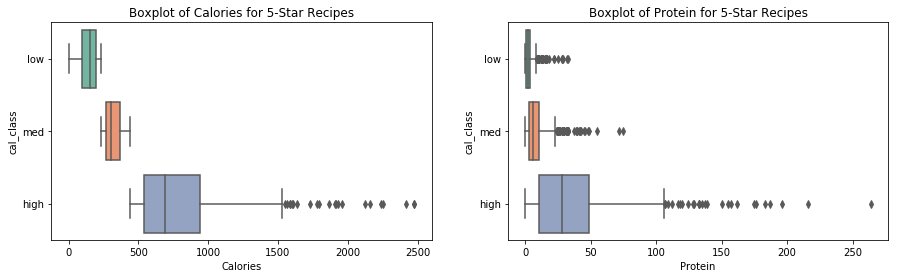

In [18]:
fig,ax = plt.subplots(1,2,figsize = (15,4)) 

sns.boxplot(y="cal_class", x="calories", data=five_star, ax=ax[0], palette="Set2");
ax[0].set_title("Boxplot of Calories for 5-Star Recipes");
ax[0].set_xlabel('Calories');

sns.boxplot(y="cal_class", x="protein", data=five_star, ax=ax[1], palette="Set2");
ax[1].set_title("Boxplot of Protein for 5-Star Recipes");
ax[1].set_xlabel('Protein');

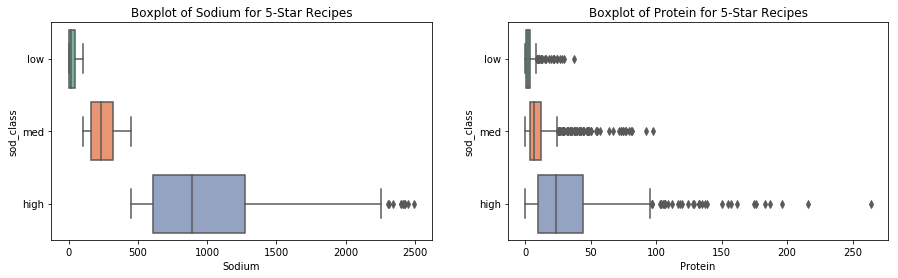

In [19]:
fig,ax = plt.subplots(1,2,figsize = (15,4)) 

sns.boxplot(y="sod_class", x="sodium", data=five_star, ax=ax[0], palette="Set2");
ax[0].set_title("Boxplot of Sodium for 5-Star Recipes");
ax[0].set_xlabel('Sodium');

sns.boxplot(y="sod_class", x="protein", data=five_star, ax=ax[1], palette="Set2");
ax[1].set_title("Boxplot of Protein for 5-Star Recipes");
ax[1].set_xlabel('Protein');

In [36]:
recipe_pool = five_star[(five_star['sod_class'] != 'high') & (five_star['cal_class'] != 'high')]

print('When we exclude high sodium and high calorie ones, there are {:,} 5-star recipes to choose from'.format(len(recipe_pool)))


When we exclude high sodium and high calorie ones, there are 883 5-star recipes to choose from


In [37]:
recipe_pool.title.value_counts().sort_values()

Capucine                                                                          1
Strawberry Roulade                                                                1
Baltimore Eggnog                                                                  1
Spiced Apple-Cider Granita with Ginger Whipped Cream                              1
Sticky Toffee Pudding with Blood Orange, Tangerine, and Whipped Crème Fraîche     1
Campari and Grapefruit Ice Pops                                                   1
Tomato Salad with Red Onion and Herbs                                             1
Passion Fruit Champagne Cocktail                                                  1
Caramelized Bananas                                                               1
Pineapple-Mint Mojito                                                             1
Peppery Fig and Cider Compote                                                     1
Matzo Balls                                                                 

In [38]:
recipe_pool.head()

,title,rating,calories,protein,fat,sodium,cal_class,sod_class
14,Mozzarella-Topped Peppers with Tomatoes and Ga...,5.0,107.0,5.0,7.0,344.0,low,med
15,"Tuna, Asparagus, and New Potato Salad with Chi...",5.0,421.0,10.0,33.0,383.0,med,med
81,Apricot-Pistachio Muffins Baked on the Grill,5.0,247.0,5.0,10.0,185.0,med,med
89,Tropical Rum Punch,5.0,230.0,1.0,0.0,26.0,low,low
98,Pastry Dough,5.0,234.0,3.0,16.0,99.0,med,low


Some text manipulation:

In [39]:
# ! pip install unidecode

In [40]:
import unidecode
import re

df = recipe_pool #[['title','rating','calories','protein','fat','sodium']]
df['title'] = df['title'].map(lambda x: unidecode.unidecode(x).lower())

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, " ")
    return text

df['title'] = df['title'].apply(remove_punctuations)
df['title'] = df['title'].map(lambda x: re.sub("\s\s+" , " ", x.strip()))

In [41]:
df.title.value_counts().sort_values()

pineapple mint mojito                                                     1
lemon pepper dill sauce                                                   1
basil vodka gimlets                                                       1
midwestern whole wheat dried fruit stuffing                               1
strawberry almond and pea salad                                           1
cherry pistachio coconut cake                                             1
spiced apple cider with rum whipped cream                                 1
frisee and celery salad with toasted fennel seed dressing                 1
green peppercorn cornmeal crackers                                        1
peches melba                                                              1
spumante vodka cocktail with lemon sorbet                                 1
bee s knees                                                               1
                                                                         ..
strawberry d

In [42]:
df.drop_duplicates('title' ,inplace=True)

In [43]:
print(df.shape)
df.head()

(881, 8)


,title,rating,calories,protein,fat,sodium,cal_class,sod_class
14,mozzarella topped peppers with tomatoes and ga...,5.0,107.0,5.0,7.0,344.0,low,med
15,tuna asparagus and new potato salad with chive...,5.0,421.0,10.0,33.0,383.0,med,med
81,apricot pistachio muffins baked on the grill,5.0,247.0,5.0,10.0,185.0,med,med
89,tropical rum punch,5.0,230.0,1.0,0.0,26.0,low,low
98,pastry dough,5.0,234.0,3.0,16.0,99.0,med,low


In [45]:
# #plotting macronutrients & recipe ratings
# dict_plt = {0:'calories',1:'protein',2:'fat',3:'sodium'}

# # sns.set(font_scale=.7)

# fig, ax = plt.subplots(1,4, figsize=(15,3))

# for i in range(4):
#     sns.barplot(x='rating',y=dict_plt[i], data=df, ax=ax[i], errwidth=1)
#     ax[i].set_title('rating by {}'.format(dict_plt[i]), size=15)
#     ax[i].set_ylabel('')

Setting up the LP Problem:

initialize the problem with maximization or minimization objective:

In [46]:
lp_model = pulp.LpProblem('The Diet Problem', pulp.LpMaximize)

In [47]:
recipes = df['title'].tolist()
calories = df['calories'].tolist()
protein = df['protein'].tolist()
sodium = df['sodium'].tolist()

In [48]:
# recipes

identify variables: 

In [49]:
# creates a dictionary of LP variables
# This function creates a dictionary of LP Variables with the specified associated parameters.

x = pulp.LpVariable.dict('x_%s', recipes, lowBound=0, upBound = 1, cat='Binary')

print(type(x))
# print(x)

<class 'dict'>


In [50]:
# for key,value in x.items():
#         print(value)

In [51]:
len(x.values())

881

In [52]:
x.get('breakfast bowl with quinoa and berries')

x_breakfast_bowl_with_quinoa_and_berries

In [53]:
cal = dict(zip(recipes, calories))
prot = dict(zip(recipes, protein))
sod = dict(zip(recipes, sodium))

In [54]:
# cal
print(cal.get('breakfast bowl with quinoa and berries'))
print(prot.get('breakfast bowl with quinoa and berries'))
print(sod.get('breakfast bowl with quinoa and berries'))

173.0
5.0
3.0


In [55]:
# create the objective
lp_model += sum([prot[i] * x[i] for i in recipes])

In [56]:
#constraints
lp_model += sum([cal[i]*x[i] for i in recipes]) <= 2000 
lp_model += sum([sod[i]*x[i] for i in recipes]) <= 1500

In [58]:
lp_model += sum([x[i] for i in x.keys()]) <= 4

In [59]:
print(lp_model)
lp_model.writeLP("find_recipes.lp" )

The Diet Problem:
MAXIMIZE
2.0*x_3_ingredient_caramel_pear_galette + 3.0*x_3_ingredient_peanut_butter_cookies + 3.0*x_all_butter_pie_dough + 4.0*x_almond_and_chocolate_dacquoise_with_cranberry_sauce + 5.0*x_almond_ice_cream_terrine_with_chocolate_truffles_and_raspberry_sauce + 2.0*x_ancho_chile_sauce + 8.0*x_angel_hair_with_lemon_kale_and_pecans + 1.0*x_apple_and_blackberry_sorbet + 5.0*x_apple_and_fig_custard + 2.0*x_apple_and_tart_cherry_pie + 4.0*x_apple_fritters_with_bourbon_ice_cream + 2.0*x_apple_ginger_chutney + 4.0*x_apple_pie_with_walnut_streusel + 5.0*x_apricot_berry_trifle + 3.0*x_apricot_miso_jam + 5.0*x_apricot_pistachio_muffins_baked_on_the_grill + 1.0*x_arugula_endive_and_fennel_salad_with_chunky_olive_vinaigrette + 2.0*x_asian_fruit_salad_with_papaya_mint_sauce + 2.0*x_asian_pear_and_frisee_salad + 3.0*x_aunt_holly_s_banana_bread + 3.0*x_aunt_tom_s_italian_cream_cake + 8.0*x_austrian_crepes + 2.0*x_avocado_salsa + 1.0*x_baguette_toasts + 1.0*x_baharat_seasoning + 2.0*x_

In [60]:
#solve
status = lp_model.solve()

print("Status:", LpStatus[lp_model.status])
print ("Individual decision_variables: ")
for v in lp_model.variables():
    print(v.name, "=", v.varValue)
# print ("Value of the obj function: ")
# print(value(lp_model.objective))

Status: Optimal
Individual decision_variables: 
x_3_ingredient_caramel_pear_galette = 0.0
x_3_ingredient_peanut_butter_cookies = 0.0
x_all_butter_pie_dough = 0.0
x_almond_and_chocolate_dacquoise_with_cranberry_sauce = 0.0
x_almond_ice_cream_terrine_with_chocolate_truffles_and_raspberry_sauce = 0.0
x_amaretto_mimosa = 0.0
x_ancho_chile_sauce = 0.0
x_angel_hair_with_lemon_kale_and_pecans = 0.0
x_apple_and_blackberry_sorbet = 0.0
x_apple_and_fig_custard = 0.0
x_apple_and_tart_cherry_pie = 0.0
x_apple_fritters_with_bourbon_ice_cream = 0.0
x_apple_ginger_chutney = 0.0
x_apple_pie_with_walnut_streusel = 0.0
x_apricot_berry_trifle = 0.0
x_apricot_miso_jam = 0.0
x_apricot_pistachio_muffins_baked_on_the_grill = 0.0
x_artillery_punch = 0.0
x_arugula_endive_and_fennel_salad_with_chunky_olive_vinaigrette = 0.0
x_asian_fruit_salad_with_papaya_mint_sauce = 0.0
x_asian_pear_and_frisee_salad = 0.0
x_aunt_holly_s_banana_bread = 0.0
x_aunt_tom_s_italian_cream_cake = 0.0
x_austrian_crepes = 0.0
x_avocado

x_rum_raisin_french_toast = 0.0
x_rum_sabayon = 0.0
x_rutabaga_and_carrot_puree = 0.0
x_rye_crispbread_crackers_with_pepper_dill_creme_fraiche_and_smoked_salmon = 0.0
x_saffron_alioli = 0.0
x_saffron_mayonnaise = 0.0
x_salmon_with_sriracha_sauce_and_lime = 0.0
x_salsa_criolla = 0.0
x_salted_brown_butter_cookies = 0.0
x_salted_caramel_ice_cream = 0.0
x_sangria = 0.0
x_sangria_ii = 0.0
x_sangria_iv = 0.0
x_sashimi_salad_with_soy_and_orange = 0.0
x_savory_spring_vegetable_and_goat_cheese_tart = 0.0
x_savory_summer_tarts = 0.0
x_sazerac = 0.0
x_scallop_shrimp_and_squid_ceviche = 0.0
x_scarborough_fair_shortbread = 0.0
x_sea_breeze = 0.0
x_sea_breeze_sparklers = 0.0
x_seafood_canapes_with_lemon_chive_butter = 0.0
x_seafood_empanaditas = 0.0
x_seared_duck_breasts_with_red_wine_sauce_and_candied_kumquats = 1.0
x_seared_steak_lettuce_cups = 0.0
x_serrano_ham_and_poblano_corn_pudding = 0.0
x_sesame_crusted_salmon = 0.0
x_shallot_and_garlic_butter = 0.0
x_shallot_butter = 0.0
x_sherry_tomato_gra

In [61]:
variable_name = []
variable_value = []

for v in lp_model.variables():
    variable_name.append(v.name)
    variable_value.append(v.varValue)

df2 = pd.DataFrame({'title': variable_name, 'decision': variable_value})

In [62]:
df2.head()

,title,decision
0,x_3_ingredient_caramel_pear_galette,0.0
1,x_3_ingredient_peanut_butter_cookies,0.0
2,x_all_butter_pie_dough,0.0
3,x_almond_and_chocolate_dacquoise_with_cranberr...,0.0
4,x_almond_ice_cream_terrine_with_chocolate_truf...,0.0


In [63]:
df.head()

,title,rating,calories,protein,fat,sodium,cal_class,sod_class
14,mozzarella topped peppers with tomatoes and ga...,5.0,107.0,5.0,7.0,344.0,low,med
15,tuna asparagus and new potato salad with chive...,5.0,421.0,10.0,33.0,383.0,med,med
81,apricot pistachio muffins baked on the grill,5.0,247.0,5.0,10.0,185.0,med,med
89,tropical rum punch,5.0,230.0,1.0,0.0,26.0,low,low
98,pastry dough,5.0,234.0,3.0,16.0,99.0,med,low


In [64]:
# more text cleaning to merge dataframes 
df2['title'] = df2['title'].str[2:].str.replace('_', ' ').str.strip()

In [65]:
df2.head()

,title,decision
0,3 ingredient caramel pear galette,0.0
1,3 ingredient peanut butter cookies,0.0
2,all butter pie dough,0.0
3,almond and chocolate dacquoise with cranberry ...,0.0
4,almond ice cream terrine with chocolate truffl...,0.0


In [66]:
m = pd.merge(df2, df, how='left', on='title')

In [67]:
print(m.shape)
print(df.shape)
print(df2.shape)
m.head()

(881, 9)
(881, 8)
(881, 2)


,title,decision,rating,calories,protein,fat,sodium,cal_class,sod_class
0,3 ingredient caramel pear galette,0.0,5.0,234.0,2.0,7.0,213.0,med,med
1,3 ingredient peanut butter cookies,0.0,5.0,100.0,3.0,6.0,5.0,low,low
2,all butter pie dough,0.0,5.0,277.0,3.0,19.0,194.0,med,med
3,almond and chocolate dacquoise with cranberry ...,0.0,5.0,304.0,4.0,13.0,69.0,med,low
4,almond ice cream terrine with chocolate truffl...,0.0,5.0,363.0,5.0,22.0,28.0,med,low


In [68]:
m[m['decision'] == 1]

,title,decision,rating,calories,protein,fat,sodium,cal_class,sod_class
232,duck bigarade,1.0,5.0,324.0,42.0,9.0,209.0,med,med
254,fish with curried cucumber tomato water and to...,1.0,5.0,411.0,72.0,9.0,421.0,med,med
332,grilled striped bass,1.0,5.0,412.0,75.0,10.0,293.0,med,med
696,seared duck breasts with red wine sauce and ca...,1.0,5.0,404.0,49.0,11.0,175.0,med,med


In [69]:
m[m['decision'] == 1].protein.sum()

238.0

In [70]:
m[m['decision'] == 1].calories.sum()

1551.0

In [71]:
m[m['decision'] == 1].sodium.sum()

1098.0